 **0.Аналіз даних перед початком роботи**

In [17]:
# Розмір датасету
df.shape
print(f'Набір даних містить {df.shape[0]} рядків та {df.shape[1]} колонки')

Набір даних містить 50447 рядків та 32 колонки


In [18]:
# Назва колонок та тип даних
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50447 entries, 0 to 50446
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Receipt Number       50447 non-null  object        
 1   Date                 50447 non-null  datetime64[ns]
 2   Year                 50447 non-null  int64         
 3   Month                50447 non-null  int64         
 4   Time                 50447 non-null  object        
 5   Mobile Number        50447 non-null  int64         
 6   Membership ID        50447 non-null  object        
 7   Loyalty Card Points  50447 non-null  int64         
 8   Age                  50447 non-null  int64         
 9   Gender               50447 non-null  object        
 10  City                 50447 non-null  object        
 11  Country              50447 non-null  object        
 12  Category             50447 non-null  object        
 13  Sub_Category         50447 non-

In [26]:
# Заміна деяких типів даних
df = df.astype({'Year': 'int64', 'Month': 'int64', 'Loyalty Card Points' : 'int64', 'Age' : 'int64', 'QTY' : 'int64', 'Mobile Number' : 'str'})

In [27]:
# Переглянемо вміст даних по всім колонкам
pd.options.display.max_columns = None
df.head(3)

,Receipt Number,Date,Year,Month,Time,Mobile Number,Membership ID,Loyalty Card Points,Age,Gender,City,Country,Category,Sub_Category,Items,Brand,Description,Price,QTY,DISC,Amount,Net Bill Amount,GST,Gross Bill Amount,Payment Mode,Bank Name,% Profit Margin,% Operating Cost,% Product Cost,Profit Margin,Operating Cost,Product Cost,Net Bill Amount Recalculation,Gross Bill Amount Recalculation
0,GIJ00001,2016-01-02,2016,1,10:08:03.260000,9793548581,MIDID0001,1,36,Male,Jakarta,Indonesia,"Choco, Snacks, Sweets",Biscuits & Crackers,Oreo mini oreo sharepack,Oreo,540 g,3.09,4,0.02,12.1128,12.1128,0.1,13.32408,Card,Enterprise Bank,0.150,0.15,0.700,1.85400,1.8540,8.65200,12.1128,13.32408
1,GIJ00002,2016-01-02,2016,1,15:46:50.832000,9938441276,MIDID0002,2,54,Male,Jakarta,Indonesia,"Wines, Beers & Spirits",Beer,Ashai Lager Beer,Ashai,480 ml,11.60,2,0.01,22.9680,22.9680,0.1,25.26480,Card,Philippine Veterans Bank,0.118,0.15,0.732,2.73760,3.4800,16.98240,22.9680,25.26480
2,GIJ00003,2016-01-02,2016,1,11:28:52.166000,9976742552,MIDID0003,1,16,Female,Jakarta,Indonesia,Fruit & Vegetable,Frozen Fruits,Cascadian farm organic strawberries,Cascadiam Farm,1 Kg,13.31,1,0.01,13.1769,38.3526,0.1,42.18786,Cash,BDO Unibank,0.147,0.15,0.703,1.95657,1.9965,9.35693,13.1769,14.49459


In [28]:
# Перевірка чи є пропущені значення у наборі даних
df.isna().sum()

Receipt Number                     0
Date                               0
Year                               0
Month                              0
Time                               0
Mobile Number                      0
Membership ID                      0
Loyalty Card Points                0
Age                                0
Gender                             0
City                               0
Country                            0
Category                           0
Sub_Category                       0
Items                              0
Brand                              0
Description                        0
Price                              0
QTY                                0
DISC                               0
Amount                             0
Net Bill Amount                    0
GST                                0
Gross Bill Amount                  0
Payment Mode                       0
Bank Name                          0
% Profit Margin                    0
%

In [29]:
"""
Перевірка коректності розрахункових даних для рахунків, в яких більше однієї позиції, так як дані по стовбчику "Net Bill Amount" та
"Gross Bill Amount" надані для всього рахунку, а не за окрему позицію. Візьмемо перший такий рахунок з номером "GIJ00003".
"""
df[df['Receipt Number'] == 'GIJ00003']

,Receipt Number,Date,Year,Month,Time,Mobile Number,Membership ID,Loyalty Card Points,Age,Gender,City,Country,Category,Sub_Category,Items,Brand,Description,Price,QTY,DISC,Amount,Net Bill Amount,GST,Gross Bill Amount,Payment Mode,Bank Name,% Profit Margin,% Operating Cost,% Product Cost,Profit Margin,Operating Cost,Product Cost,Net Bill Amount Recalculation,Gross Bill Amount Recalculation
2,GIJ00003,2016-01-02,2016,1,11:28:52.166000,9976742552,MIDID0003,1,16,Female,Jakarta,Indonesia,Fruit & Vegetable,Frozen Fruits,Cascadian farm organic strawberries,Cascadiam Farm,1 Kg,13.31,1,0.01,13.1769,38.3526,0.1,42.18786,Cash,BDO Unibank,0.147,0.15,0.703,1.95657,1.9965,9.35693,13.1769,14.49459
3,GIJ00003,2016-01-02,2016,1,11:28:52.166000,9976742552,MIDID0003,1,16,Female,Jakarta,Indonesia,Fruit & Vegetable,Fresh Vegetables,Oraganic 4 Life Red onions,Organic 4 Life,270 g,3.52,1,0.01,3.4848,38.3526,0.1,42.18786,Cash,BDO Unibank,0.095,0.15,0.755,0.33440,0.5280,2.65760,3.4848,3.83328
4,GIJ00003,2016-01-02,2016,1,11:28:52.166000,9976742552,MIDID0003,2,16,Female,Jakarta,Indonesia,Fruit & Vegetable,Lettuce & Salads,LIVEWELL Italian mesclun salad,LIVEWELL,570 g,4.41,1,0.01,4.3659,38.3526,0.1,42.18786,Cash,BDO Unibank,0.120,0.15,0.730,0.52920,0.6615,3.21930,4.3659,4.80249
5,GIJ00003,2016-01-02,2016,1,11:28:52.166000,9976742552,MIDID0003,3,16,Female,Jakarta,Indonesia,Fruit & Vegetable,Lettuce & Salads,ThyGrace Romanine lettuce,ThyGrace,100 g,2.81,1,0.01,2.7819,38.3526,0.1,42.18786,Cash,BDO Unibank,0.120,0.15,0.730,0.33720,0.4215,2.05130,2.7819,3.06009
6,GIJ00003,2016-01-02,2016,1,11:28:52.166000,9976742552,MIDID0003,3,16,Female,Jakarta,Indonesia,Fruit & Vegetable,Fresh Vegetables,YUVVO French Bean,YUVVO,260 g,3.28,1,0.01,3.2472,38.3526,0.1,42.18786,Cash,BDO Unibank,0.095,0.15,0.755,0.31160,0.4920,2.47640,3.2472,3.57192
7,GIJ00003,2016-01-02,2016,1,11:28:52.166000,9976742552,MIDID0003,4,16,Female,Jakarta,Indonesia,Fruit & Vegetable,Fresh Vegetables,ThyGrace Holland potato,ThyGrace,690 g,3.75,1,0.01,3.7125,38.3526,0.1,42.18786,Cash,BDO Unibank,0.095,0.15,0.755,0.35625,0.5625,2.83125,3.7125,4.08375


In [30]:
df[df['Receipt Number'] == 'GIJ00003'].Amount.sum()

30.769199999999998

In [31]:
"""Бачимо, що в таблиці сума по колонці "Net Bill Amount" становить 38.3526, у той час як наш перерахунок дав результат 30.7692.
Можливо це пов'язано з некоректною роботою знижок.
Перерахуємо показники "Net Bill Amount" та "Gross Bill Amount" окремо для кожної позиції та додамо нові стовбчики до набору даних.
"""
df['Net Bill Amount Recalculation'] = df.Price * df.QTY *(1-df.DISC)
df['Gross Bill Amount Recalculation'] = df['Net Bill Amount Recalculation'] * (1 + df.GST)
df.head(3)

,Receipt Number,Date,Year,Month,Time,Mobile Number,Membership ID,Loyalty Card Points,Age,Gender,City,Country,Category,Sub_Category,Items,Brand,Description,Price,QTY,DISC,Amount,Net Bill Amount,GST,Gross Bill Amount,Payment Mode,Bank Name,% Profit Margin,% Operating Cost,% Product Cost,Profit Margin,Operating Cost,Product Cost,Net Bill Amount Recalculation,Gross Bill Amount Recalculation
0,GIJ00001,2016-01-02,2016,1,10:08:03.260000,9793548581,MIDID0001,1,36,Male,Jakarta,Indonesia,"Choco, Snacks, Sweets",Biscuits & Crackers,Oreo mini oreo sharepack,Oreo,540 g,3.09,4,0.02,12.1128,12.1128,0.1,13.32408,Card,Enterprise Bank,0.150,0.15,0.700,1.85400,1.8540,8.65200,12.1128,13.32408
1,GIJ00002,2016-01-02,2016,1,15:46:50.832000,9938441276,MIDID0002,2,54,Male,Jakarta,Indonesia,"Wines, Beers & Spirits",Beer,Ashai Lager Beer,Ashai,480 ml,11.60,2,0.01,22.9680,22.9680,0.1,25.26480,Card,Philippine Veterans Bank,0.118,0.15,0.732,2.73760,3.4800,16.98240,22.9680,25.26480
2,GIJ00003,2016-01-02,2016,1,11:28:52.166000,9976742552,MIDID0003,1,16,Female,Jakarta,Indonesia,Fruit & Vegetable,Frozen Fruits,Cascadian farm organic strawberries,Cascadiam Farm,1 Kg,13.31,1,0.01,13.1769,38.3526,0.1,42.18786,Cash,BDO Unibank,0.147,0.15,0.703,1.95657,1.9965,9.35693,13.1769,14.49459


In [32]:
# Імпортуємо необхідні бібліотеки для подальшої роботи з даними та візуалізації.
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

**1. Подивимось які країни та міста є в наборі даних, та який прибуток вони отримують**

In [35]:
df.groupby(['Country', 'City'])['Profit Margin'].sum().sort_values()

Country      City        
Singapore    Woodlands        7489.29808
Indonesia    Jakarta         11068.59512
Malaysia     Kuala Lumpur    12958.11534
Philippines  Manila          14455.63346
Singapore    Bedok           14649.59575
Name: Profit Margin, dtype: float64

Цікаво, що в Сінгапурі (в різних містах) знаходиться самий прибутковий(Bedok) та збитковий(Woodlands) магазини. Це може бути пов'язано з різною кількістю населення, фінансовим благополуччям або ж представлені не ті категорії товарів, які потребують клієнти

**2. Переглянемо які категорії товарів більше купують у Woodlands та у Bedok**

In [36]:
Woodlands_category = df[df.City == 'Woodlands'].groupby('Category')['Net Bill Amount Recalculation'].sum()
Bedok_category = df[df.City == 'Bedok'].groupby('Category')['Net Bill Amount Recalculation'].sum()

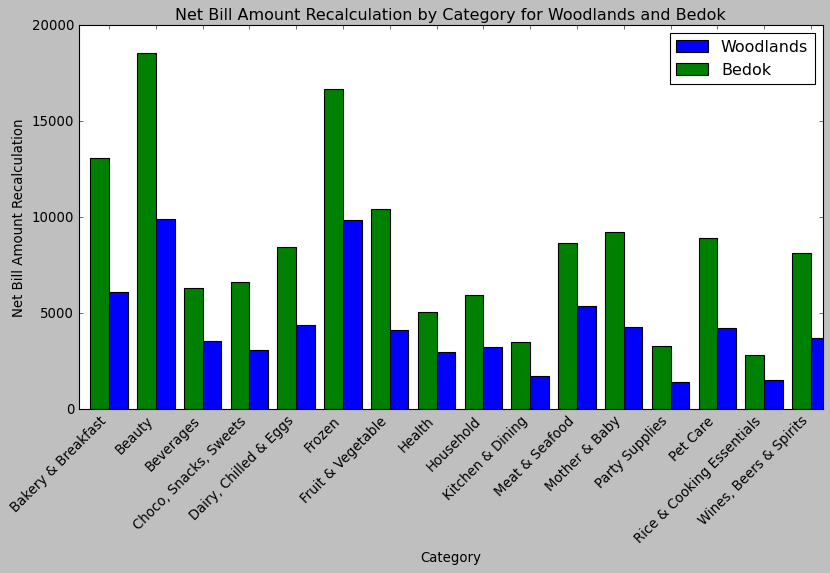

In [39]:
# За допомогою гістограми перевіримо чи всі категорії товарів представлені в містах Woodlands та Bedok та який попит по категоріям

fig, ax = plt.subplots(figsize=(12, 6))

Woodlands_category.plot(kind='bar', ax=ax, position=0, width=0.4, color='blue', label='Woodlands')
Bedok_category.plot(kind='bar', ax=ax, position=1, width=0.4, color='green', label='Bedok')

ax.set_xlabel('Category')
ax.set_ylabel('Net Bill Amount Recalculation')
ax.set_title('Net Bill Amount Recalculation by Category for Woodlands and Bedok')
ax.legend()

plt.xticks(rotation=45, ha='right')
plt.show();

З графіка видно, що всі категорії однаково присутні і в Woodlands, і в Bedok. Навіть зберігається загальна тенденція: маємо максимум продажів в категоріях Beauty та Frozen, і мінімум - в Kitchen & Dining, Party Supplies, Rice & Cooking Essentials.

**3. Порахуємо кількість унікальних клієнтів в Woodlands і в Bedok**

In [43]:
woodlands_customers_count = df[df['City'] == 'Woodlands']['Membership ID'].nunique()
bedok_customers_count = df[df['City'] == 'Bedok']['Membership ID'].nunique()

print(f'Кількість унікальних клієнтів у місті Woodlands: {woodlands_customers_count}')
print(f'Кількість унікальних клієнтів у місті Bedok: {bedok_customers_count}')

Кількість унікальних клієнтів у місті Woodlands: 557
Кількість унікальних клієнтів у місті Bedok: 1258


Отже можна зробити висновок, що більша кількість продажів у місті Bedok порівняно з Woodlands досягається за рахунок більшої кількості населення

**4. Перевіримо рівень фінансового достатку населення в Woodlands і Bedok**

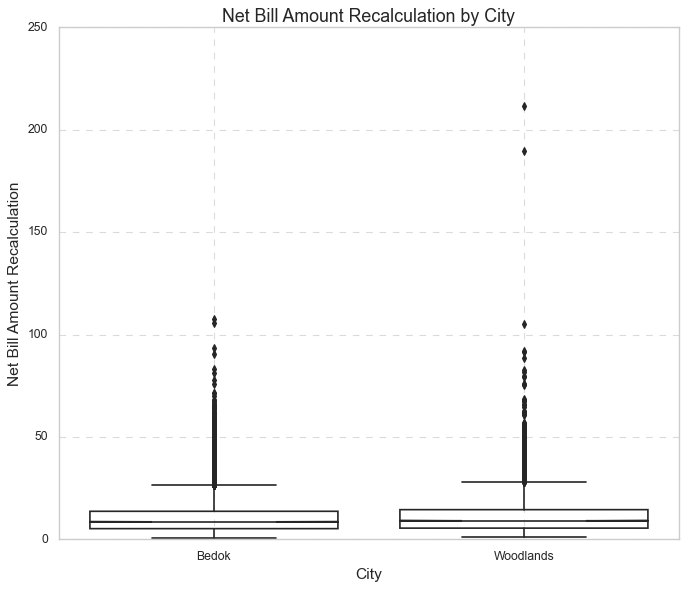

In [56]:
# Побудуємо boxplot для перегляду основних характеристик розподілу сумарних чеків
sns.set(style="whitegrid")

plt.figure(figsize=(10, 8))

sns.boxplot(data=df[df['City'].isin(['Woodlands', 'Bedok'])], 
            x='City', y='Net Bill Amount Recalculation', 
            palette={"Woodlands": "green", "Bedok": "blue"},
            notch=True, showfliers=True, boxprops={'facecolor':'none'})

plt.xlabel('City', fontsize=14)
plt.ylabel('Net Bill Amount Recalculation', fontsize=14)
plt.title('Net Bill Amount Recalculation by City', fontsize=16)
plt.grid(True, linestyle='--', alpha=0.7)

plt.show()

З графіка видно, що середній чек покупця в Woodlands і Bedok не мають суттєвих відмінностей. Отже не має сенсу вводити додатковий асортимент для більш платоспроможних покупців.
Цікаво було б дослідити 2 викиди по місту Woodlands.
Тобто робимо загальний висновок: більший дохід по місту Bedok порівняно з Woodlands досягається лише за рахунок більшої кількості населення.

**5. Переглянемо які категорії товарів найбільше та найменше прибуткові**

In [61]:
df_category = df.groupby('Category')['Profit Margin'].sum().sort_values(ascending = False)
df_category

Category
Frozen                       9261.11848
Beauty                       7989.95303
Bakery & Breakfast           6224.72130
Pet Care                     4465.25015
Fruit & Vegetable            4388.17980
Mother & Baby                4261.74189
Meat & Seafood               4166.63054
Wines, Beers & Spirits       3653.71160
Choco, Snacks, Sweets        2958.05643
Dairy, Chilled & Eggs        2668.73836
Beverages                    2409.21953
Household                    1868.32783
Health                       1775.48380
Party Supplies               1651.76802
Kitchen & Dining             1611.64675
Rice & Cooking Essentials    1266.69024
Name: Profit Margin, dtype: float64

Отже топ-3 найприбутковіших категорій: Frozen, Beauty, Bakery & Breakfast, 
найменш прибуткові: Rice & Cooking Essentials, Kitchen & Dining, Party Supplies

**6. Переглянемо дохідність по Sub_Category всередині найменш прибуткової категорії Rice & Cooking Essentials**

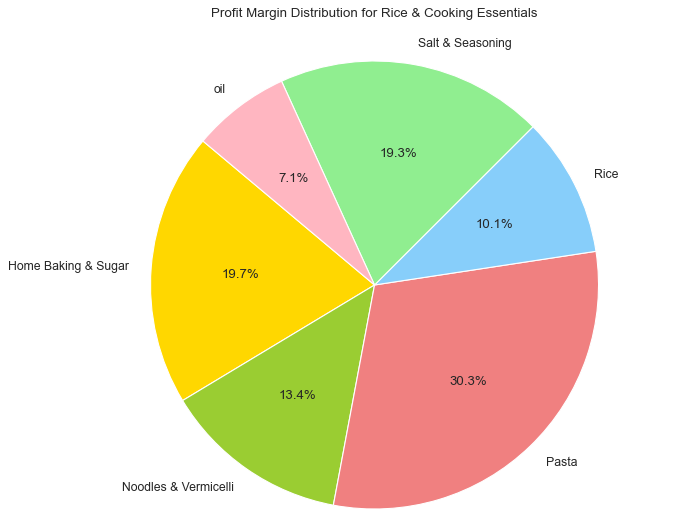

In [72]:
rice_cooking_structure = df[df['Category'] == 'Rice & Cooking Essentials'].groupby('Sub_Category')['Profit Margin'].sum()

# Дані
labels = rice_cooking_structure.index
sizes = rice_cooking_structure.values
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'lightpink']


# Побудова діаграми
plt.figure(figsize=(10, 7))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)


plt.axis('equal')
plt.title('Profit Margin Distribution for Rice & Cooking Essentials', pad=40)
plt.show()

З графіка видно, що найменш прибутковими є підкатегорії oil та Rice. Потрібно провести маркетингові заходи для привернення уваги покупців до товарів цих підкатегорій

**7. Побудуємо графік розсіювання (scatterplot) між Profit Margin та Operating Cost в найменш прибутковій категорії Rice & Cooking Essentials**

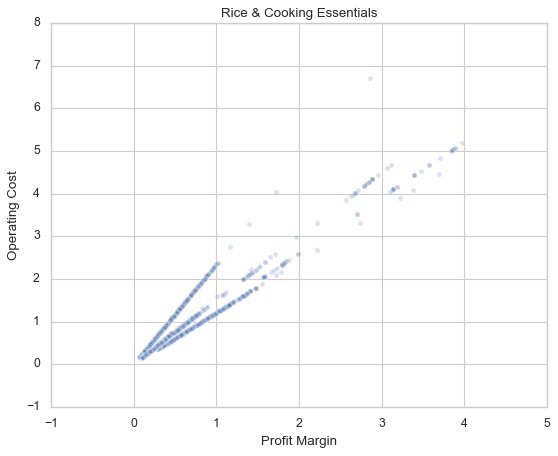

In [80]:
plt.scatter('Profit Margin', 'Operating Cost', data=df[df['Category'] == 'Rice & Cooking Essentials'], alpha=0.2)
plt.xlabel('Profit Margin')
plt.ylabel('Operating Cost')
plt.title('Rice & Cooking Essentials');

 Існує сильна позитивна кореляція між Profit Margin та Operating Cost. Точки утворюють майже пряму лінію, що вказує на те, що Profit Margin збільшується разом із Operating Cost. Що логічно, тобто зростання операційних затрат враховується для формування маржі

**8. Подивимось як змінювалась кількість покупців по рокам**

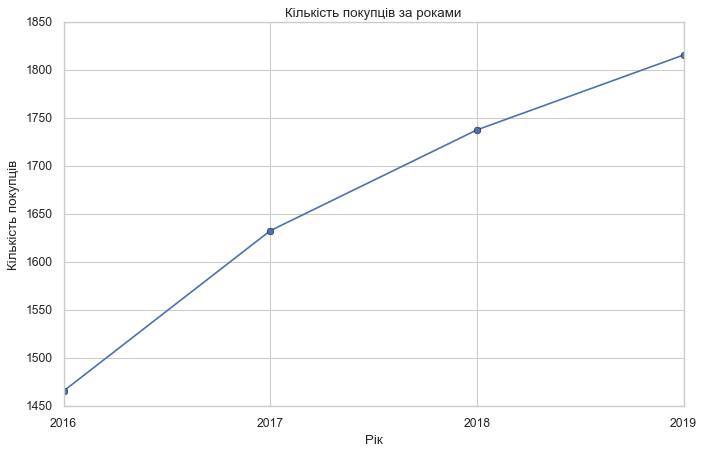

In [96]:
# Підраховуємо кількість унікальних покупців для кожного року
unique_customers_per_year = df.groupby('Year')['Membership ID'].nunique()

# Побудова графіка
plt.figure(figsize=(10, 6))
plt.plot(unique_customers_per_year.index, unique_customers_per_year.values, marker='o', linestyle='-', color='b')
plt.title('Кількість покупців за роками')
plt.xlabel('Рік')
plt.ylabel('Кількість покупців')
plt.xticks(unique_customers_per_year.index, unique_customers_per_year.index.astype(int))
plt.grid(True)
plt.show()


Бачимо, що кількість клієнтів зростає по рокам, але з кожним роком інтенсивність зростання зменшується. Можливо ця інформація буде корисна для розрахунку товариних запасів на наступні періоди

**9. Подивимось гендерний розподіл покупців, а також яким категоріям товарів вони надають перевагу**

In [98]:
df.Gender.value_counts(normalize = True)

Gender
Female    0.829028
Male      0.170972
Name: proportion, dtype: float64

In [97]:
gender_category = df.pivot_table(index=['Gender'], columns=['Category'], values=['QTY'], aggfunc='sum')
display(gender_category.style.background_gradient(axis=None, cmap='YlOrRd'))

Враховуючи суттєву перевагу кількості жінок серед покупців, бачимо, що обидві категорії клієнтів віддають перевагу товарам Bakery & Breakfast, Frozen та Beauty 

**10.Перевіримо чи є суттєва різниця між тим скільки витрачають чоловіки і скільки жінки**

In [112]:
"""Дослідимо чи є статистично значущою різниця між чеками чоловіків та жінок"""
"""Використаємо статистичний тест z-test. Рівень статистичної значущості alpha = 0.05."""

df_female = df[df.Gender == 'Female'].pivot_table(index = 'Receipt Number', values = 'Net Bill Amount Recalculation', aggfunc = 'sum' )
receipt_female = df_female.to_numpy()

df_male = df[df.Gender == 'Male'].pivot_table(index = 'Receipt Number', values = 'Net Bill Amount Recalculation', aggfunc = 'sum' )
receipt_male = df_male.to_numpy()

alpha = 0.05

In [113]:
# Нульова гіпотеза - сума чека чоловіка та жінки не відрізняється.
# Альтернативна гіпотеза - сума чека чоловіка та жінки суттєво відрізняється.

from statsmodels.stats.weightstats import ztest

ztest_results = ztest(receipt_female, receipt_male, value = 0)
ztest_results

(array([1.99143527]), array([0.04643306]))

In [114]:
if (ztest_results[1] < alpha):
    print('Відхиляємо гіпотезу Н0. Сума чека суттєво відрізняється')
else:
    print('Не можемо відхилити гіпотезу Н0. Сума чека не відрізняється.')

Відхиляємо гіпотезу Н0. Сума чека суттєво відрізняється


**11.Переглянемо основні статистичні характеристики по сумі чеків**

In [116]:
df['Net Bill Amount Recalculation'].describe()

count    50447.000000
mean        11.167962
std          9.227162
min          0.798000
25%          5.213600
50%          8.632800
75%         14.016000
max        299.827200
Name: Net Bill Amount Recalculation, dtype: float64

Ці висновки вказують на те, що більшість чеків мають відносно низькі суми, але є кілька транзакцій з дуже високими сумами, що спричиняє значну варіацію даних. Медіана нижча за середнє значення, що вказує на асиметричний розподіл даних з довгим хвостом у бік великих значень.